# First Imports from Gaia

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
import scipy.stats as sp

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [3]:
tables = Gaia.load_tables(only_names=True)
for table in (tables):
    print(table.get_qualified_name())

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]
external.external.apassdr9
external.external.gaiadr2_geometric_distance
external.external.ravedr5_com
external.external.ravedr5_dr5
external.external.ravedr5_gra
external.external.ravedr5_on
external.external.sdssdr13_photoprimary
external.external.skymapperdr1_master
external.external.tmass_xsc
public.public.hipparcos
public.public.hipparcos_newreduction
public.public.hubble_sc
public.public.igsl_source
public.public.igsl_source_catalog_ids
public.public.tycho2
public.public.dual
tap_config.tap_config.coord_sys
tap_schema.tap_schema.columns
tap_schema.tap_schema.key_columns
tap_schema.tap_schema.keys
tap_schema.tap_schema.schemas
tap_schema.tap_schema.tables
gaiadr1.gaiadr1.aux_qso_icrf2_match
gaiadr1.gaiadr1.ext_phot_zero_point
gaiadr1.gaiadr1.allwise_best_neighbour
gaiadr1.gaiadr1.allwise_neighbourhood
gaiadr1.gaiadr1.gsc23_best_neighbour

## DR2 Vari Cepheid

In [4]:
table = Gaia.load_table('gaiadr2.vari_cepheid')
print(table)

Retrieving table 'gaiadr2.vari_cepheid'
Parsing table 'gaiadr2.vari_cepheid'...
Done.
TAP Table name: gaiadr2.gaiadr2.vari_cepheid
Description: This table describes the Cepheid stars.
Num. columns: 47


In [5]:
#The total number of Cepehids in DR2 is 9575 (Clementini1, Ripepi, 2019, Table 2)
job = Gaia.launch_job_async("select top 10000 * from gaiadr2.vari_cepheid order by source_id")
print(job)

INFO: Query finished. [astroquery.utils.tap.core]
<Table masked=True length=9575>
             name               dtype  unit                                                             description                                                              n_bad
------------------------------ ------- ---- ------------------------------------------------------------------------------------------------------------------------------------ -----
                   solution_id   int64                                                                                                                       Solution Identifier     0
                     source_id   int64                                                                                                                  Unique source identifier     0
                            pf float64    d                         Period corresponding to the fundamental pulsation mode (for multi mode pulsators) in  the G band time series  3640
   

In [6]:
r = job.get_results()
#len(r['source_id']) == 9575
r

solution_id,source_id,pf,pf_error,p1_o,p1_o_error,p2_o,p2_o_error,p3_o,p3_o_error,epoch_g,epoch_g_error,epoch_bp,epoch_bp_error,epoch_rp,epoch_rp_error,int_average_g,int_average_g_error,int_average_bp,int_average_bp_error,int_average_rp,int_average_rp_error,peak_to_peak_g,peak_to_peak_g_error,peak_to_peak_bp,peak_to_peak_bp_error,peak_to_peak_rp,peak_to_peak_rp_error,metallicity,metallicity_error,r21_g,r21_g_error,r31_g,r31_g_error,phi21_g,phi21_g_error,phi31_g,phi31_g_error,num_clean_epochs_g,num_clean_epochs_bp,num_clean_epochs_rp,g_absorption,g_absorption_error,type_best_classification,type2_best_sub_classification,mode_best_classification,multi_mode_best_classification
,,d,d,d,d,d,d,d,d,d,d,d,d,d,d,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,dex,dex,,,,,rad,rad,rad,rad,,,,mag,mag,,,,
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,int32,float64,float64,object,object,object,object
369295551293819386,45270673287508864,4.940520990791141,1.0930561122239987e-05,--,--,--,--,--,--,1697.0205248162358,1.5458147783419867e-05,1696.9818368261865,1.5458147783419867e-05,1697.007947537716,1.5458147783419867e-05,12.429044314775076,8.268186692659334e-05,13.23629126385389,0.0005295106763861737,11.518532219447621,0.00030877771198517745,0.5993462682285511,0.0005712752405471872,0.7054006442641061,0.0032856889062259963,0.556323269889127,0.0018548604523498595,--,--,--,--,--,--,--,--,--,--,16,14,14,--,--,DCEP,--,FUNDAMENTAL,--
369295551293819386,47299585774090112,16.639919858617944,0.0015679305378952161,--,--,--,--,--,--,1666.9258561429276,0.002217388631550357,1664.8981079868129,0.002217388631550357,1666.620902584565,0.002217388631550357,16.62583718080603,0.0016703631440428877,17.312196955503595,0.0193185509565418,15.7765311336666,0.010703231476196659,1.1901994643017701,0.0046844344230449805,1.6814082435594315,0.09162933988744354,1.0956164178219119,0.0335812016372231,--,--,0.19097896792404206,0.0019303244621986344,0.06965189080733286,0.0016508054227626896,5.308012636318175,0.013343924352439475,2.726637796940045,0.0562081712673857,25,23,23,--,--,DCEP,--,FUNDAMENTAL,--
369295549951641967,61259706956316800,14.634006584297543,0.0007061864161724821,--,--,--,--,--,--,1673.730561019529,0.0009986984073147751,1673.5920693421529,0.0009986984073147751,1673.6003099471109,0.0009986984073147751,16.172268276009525,0.01798906893356663,16.728967305190487,0.0034548018373227346,15.352690562477306,0.005728885471315912,0.9467132540245462,0.13628997554325556,0.70965663550394,0.02329299962158515,0.6375861802260481,0.036352599545395166,--,--,0.2924514429815647,0.06935636475035548,0.3058559701180422,0.08491529356044825,4.04061750747524,1.8189102118823193,3.185898889711204,0.534895468155296,32,30,31,--,--,DCEP,--,FUNDAMENTAL,--
369295551293819386,69969728833405184,1.238719042773407,8.058903737920933e-06,--,--,0.8102853338275792,5.8031029958154136e-06,--,--,1705.8396087426213,6.62190971198201e-06,1705.8113914522166,6.62190971198201e-06,1705.8325438342586,6.62190971198201e-06,15.686372085384775,0.0011835633661839825,16.012119088280535,0.0033035224125411294,15.1371786954683,0.0034220827606032,0.5185025668883796,0.001673811364385342,0.2551134013194236,0.004671886199419152,0.20646830549862827,0.004839555851608207,--,--,0.4308588566826108,0.002709440601272971,--,--,5.015892920121637,0.006948489167840254,--,--,15,14,14,--,--,DCEP,--,MULTI,F/2O
369295551293819386,99384413653590400,1.0280590154658313,6.72628017834883e-07,--,--,--,--,--,--,1700.9459410250242,9.512396652542237e-07,1700.9442054368924,9.512396652542237e-07,1700.9587303913643,9.512396652542237e-07,13.489298955185037,0.00012703479292437814,13.819457979760926,0.0008256147347769303,12.980156335827344,0.0007650007355050325,0.5552857648010487,0.0004891520530707

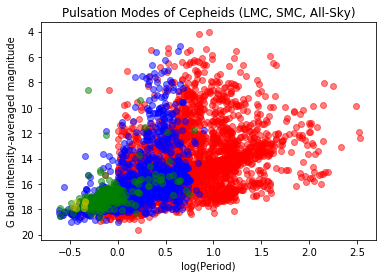

In [7]:
#%matplotlib notebook
#Fundamental
plt.scatter(np.log10(r['pf']), r['int_average_g'], color='r', alpha=0.5)
#First overtone
plt.scatter(np.log10(r['p1_o']), r['int_average_g'], color='b', alpha=0.5)
#Second overtone
plt.scatter(np.log10(r['p2_o']), r['int_average_g'], color='g', alpha=0.5)
#Third overtone
plt.scatter(np.log10(r['p3_o']), r['int_average_g'], color='y', alpha=0.5)
plt.gca().invert_yaxis()
plt.title('Pulsation Modes of Cepheids (LMC, SMC, All-Sky)')
plt.xlabel('log(Period)')
plt.ylabel('G band intensity-averaged magnitude')
plt.savefig('Gaia_Cepheids.pdf', bboxes='tight')
plt.show()

### Counting the Cepheid types

In [8]:
#str(r['type_best_classification'][0]) == 'b\'DCEP\''
DCEPs = []
T2CEPs = []
ACEPs = []
for i in range(0,len(r)):
    DCEP = np.count_nonzero(np.where(str(r['type_best_classification'][i]) == 'b\'DCEP\'', 1, 0))
    DCEPs.append(DCEP)
    T2CEP = np.count_nonzero(np.where(str(r['type_best_classification'][i]) == 'b\'T2CEP\'', 1, 0))
    T2CEPs.append(T2CEP)
    ACEP = np.count_nonzero(np.where(str(r['type_best_classification'][i]) == 'b\'ACEP\'', 1, 0))
    ACEPs.append(ACEP)
DCEP_count = np.count_nonzero(DCEPs)
T2CEP_count = np.count_nonzero(T2CEPs)
ACEP_count = np.count_nonzero(ACEPs)
DCEP_ind = np.nonzero(DCEPs)[0]
T2CEP_ind = np.nonzero(T2CEPs)[0]
ACEP_ind = np.nonzero(ACEPs)[0]
len(r) == DCEP_count + T2CEP_count + ACEP_count
print(DCEP_count, T2CEP_count, ACEP_count)

8890 585 100


In [9]:
asas_ind = np.argwhere(r['source_id']==2947530506428832768)[0][0]
r['int_average_g'][asas_ind]

12.67701578903637

## DR2 Vari Time Series Statistics

In [10]:
table2 = Gaia.load_table('gaiadr2.vari_time_series_statistics')
print(table2)

Retrieving table 'gaiadr2.vari_time_series_statistics'
Parsing table 'gaiadr2.vari_time_series_statistics'...
Done.
TAP Table name: gaiadr2.gaiadr2.vari_time_series_statistics
Description: Statistical parameters of time series, using only transits not rejected,
see rejectedByVariability column in the VO Table epochPhotometryUrl in
gaiaSource.

Note that NaN will be reported when the parameter value is missing or
cannot be calculated.
Num. columns: 44


In [11]:
job2 = Gaia.launch_job_async("select top 10000 * from gaiadr2.vari_time_series_statistics order by source_id")
print(job2)

INFO: Query finished. [astroquery.utils.tap.core]
<Table masked=True length=10000>
        name         dtype  unit                            description                            n_bad
------------------- ------- ---- ----------------------------------------------------------------- -----
        solution_id   int64                                                    Solution Identifier     0
          source_id   int64                                               Unique source identifier     0
 num_selected_g_fov   int32       Total number of G FOV transits selected for variability analysis     0
mean_obs_time_g_fov float64    d                          Mean observation time for G FoV transits     0
time_duration_g_fov float64    d               Time duration of the time series for G FoV transits     0
      min_mag_g_fov float64  mag                                           Minimum G FoV magnitude     0
      max_mag_g_fov float64  mag                                           Ma

In [12]:
r2 = job2.get_results()
len(r2['source_id'])

10000

## Donwloading Light Curves

"Light curves in DR2 are located in a different place than regular tables like gaia_source"

In [13]:
lcs = np.loadtxt('light_curves_first.txt',skiprows=1,delimiter=',',usecols=(0,3,4,5))
#lcs = np.genfromtxt('light_curves_first.txt',skip_header=1,delimiter=',',dtype=None)
lcs_band = np.loadtxt('light_curves_first.txt',skiprows=1,delimiter=',',usecols=2, dtype=np.str)

In [14]:
lcs[:,2]

array([15.81252981, 15.79708156, 15.81373962, ..., 14.99994207,
       15.01068745, 14.98556241])

In [15]:
source_id = lcs[:,0]
band = lcs_band
time = lcs[:,1]
mag = lcs[:,2]
flux = lcs[:,3]
#First example, the ASAS designated star in the first row of Ripepi Table 2 
asas_ind = np.argwhere(source_id==2947530506428832768)
asas_mag = mag[asas_ind[0][0]:asas_ind[-1][0]]
asas_time = time[asas_ind[0][0]:asas_ind[-1][0]]
asas_flux = flux[asas_ind[0][0]:asas_ind[-1][0]]
#Seperating bands
asas_band = band[asas_ind[0][0]:asas_ind[-1][0]]
G_ind = np.argwhere(asas_band=='G')
BP_ind = np.argwhere(asas_band=='BP')
RP_ind = np.argwhere(asas_band=='RP')
asas_time_G = asas_time[G_ind[0][0]:G_ind[-1][0]]
asas_time_BP = asas_time[BP_ind[0][0]:BP_ind[-1][0]]
asas_time_RP = asas_time[RP_ind[0][0]:RP_ind[-1][0]]
#time_BP and time_RP are nearly identical to time_G, but have different lengths
asas_mag_G = asas_mag[G_ind[0][0]:G_ind[-1][0]]
asas_mag_BP = asas_mag[BP_ind[0][0]:BP_ind[-1][0]]
asas_mag_RP = asas_mag[RP_ind[0][0]:RP_ind[-1][0]]
asas_flux_G = asas_flux[G_ind[0][0]:G_ind[-1][0]]
asas_flux_BP = asas_flux[BP_ind[0][0]:BP_ind[-1][0]]
asas_flux_RP = asas_flux[RP_ind[0][0]:RP_ind[-1][0]]
#asas_flux = flux[asas_ind[0][0]:asas_ind[-1][0]]

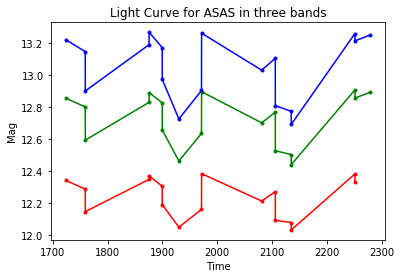

In [16]:
plt.plot(asas_time_G, asas_mag_G, 'g.-')
plt.plot(asas_time_BP, asas_mag_BP, 'b.-')
plt.plot(asas_time_RP, asas_mag_RP, 'r.-')
plt.title('Light Curve for ASAS in three bands')
plt.xlabel('Time')
plt.ylabel('Mag')
plt.savefig('Light_Curve_2947530506428832768.pdf', bboxes='tight')
plt.show()

### Determining the "intensity averaged magnitudes"

In [18]:
mean_G_ripepi = r['int_average_g'][np.argwhere(r['source_id']==2947530506428832768)]
mean_G = np.mean(asas_mag_G)
#average_G = np.average(asas_mag_G)
gmean_G = sp.gmean(asas_mag_G)
hmean_G = sp.hmean(asas_mag_G)
std_G = np.std(asas_mag_G)
print(mean_G_ripepi)
print(mean_G)
print(gmean_G)
print(hmean_G)

int_average_g [1]
       mag       
-----------------
12.67701578903637
12.726036353279031
12.725051667293712
12.724062939015703


In [ ]:
len(asas_time_G)

In [ ]:
asas_ind